In [ ]:
import numpy as np
import os
import imageio
import matplotlib.image as img
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from skimage import data
from skimage.metrics import structural_similarity
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io

Structural Similarity: 62.3743%


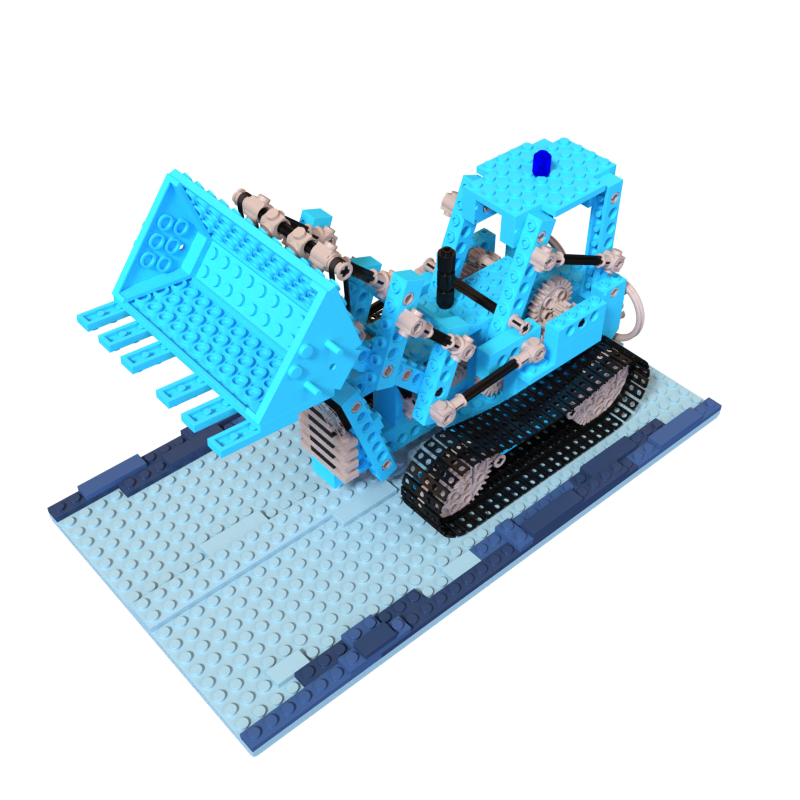

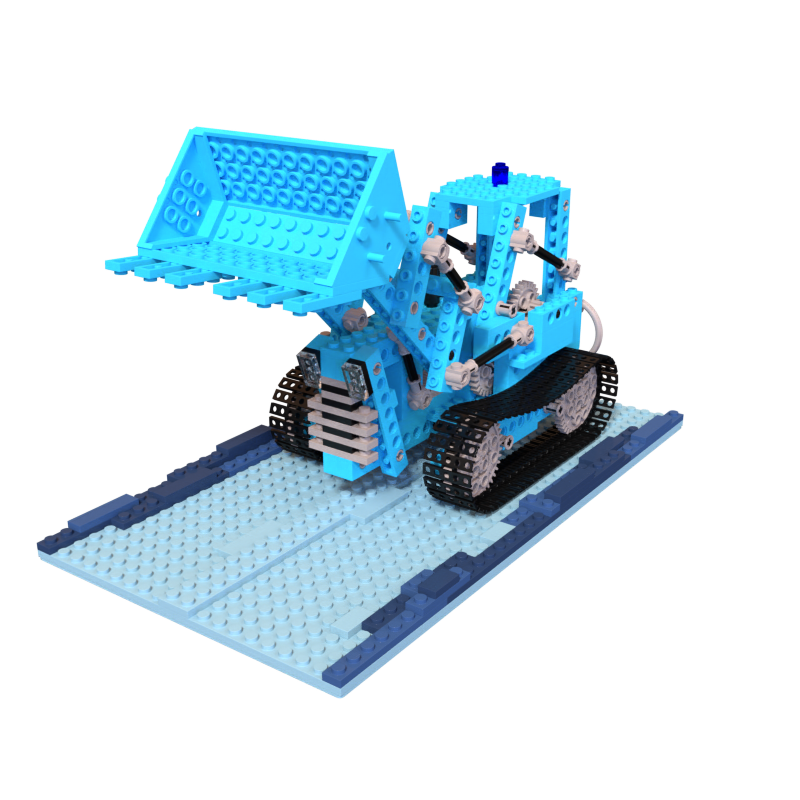

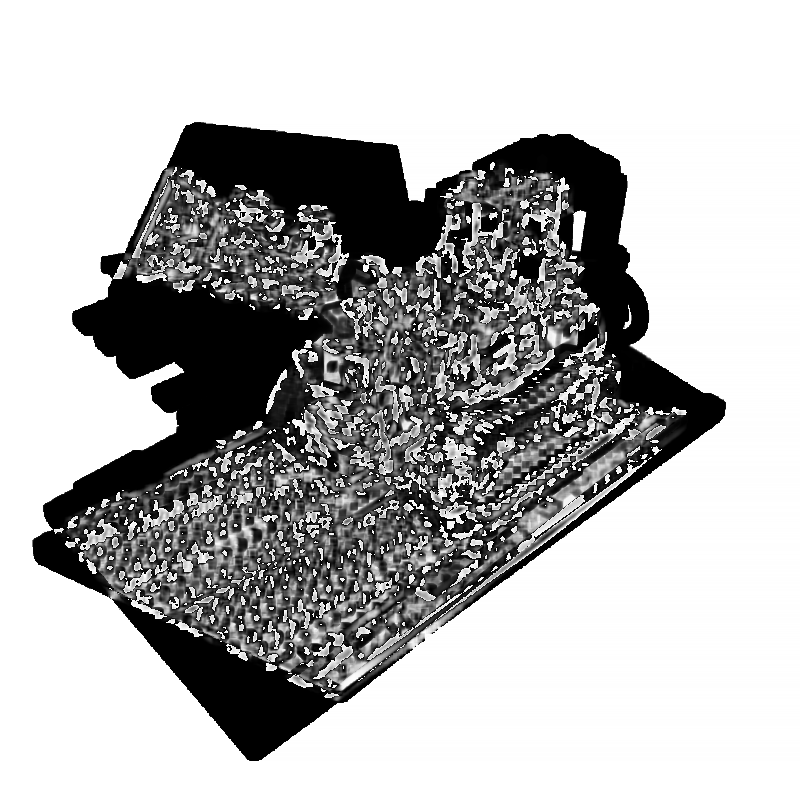

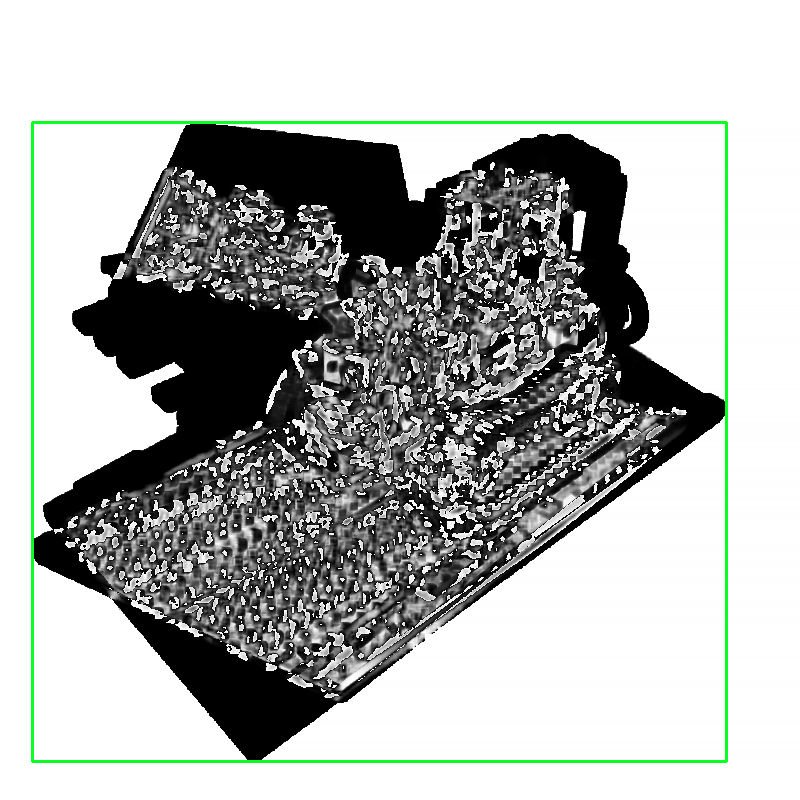

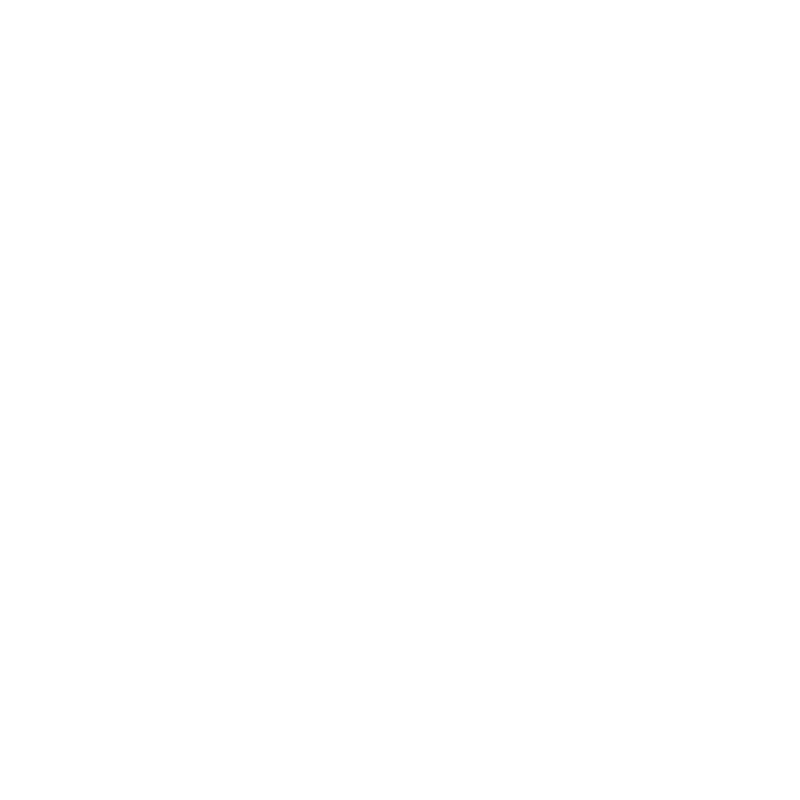

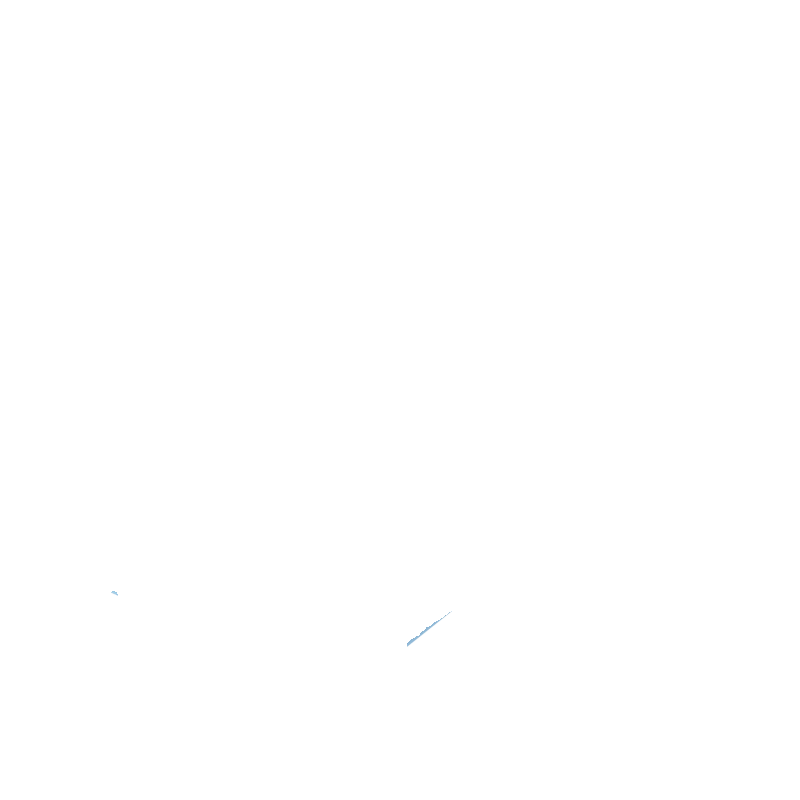

-1

In [ ]:
'''Structural Similarity Index (SSIM)'''

# Load images
before = io.imread('r_6.png')
after = io.imread('r_60.png')

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Structural Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

cv2_imshow( before)
cv2_imshow( after)
cv2_imshow( diff)
cv2_imshow( diff_box)
cv2_imshow( mask)
cv2_imshow( filled_after)
cv2.waitKey()

In [ ]:
# # Load images as grayscale
# image1 = io.imread('r_6.png')
# image2 = io.imread('r_60.png')
# # Calculate the per-element absolute difference between 
# # two arrays or between an array and a scalar
# diff = 255 - cv2.absdiff(image1, image2)

# cv2_imshow( diff)

In [ ]:
# # Load images as grayscale
# image1 = io.imread('r_6.png')
# image2 = io.imread('r_60.png')


# plt.imshow(image1 - image2)

Image matching Error between the two images: 22.4604265625


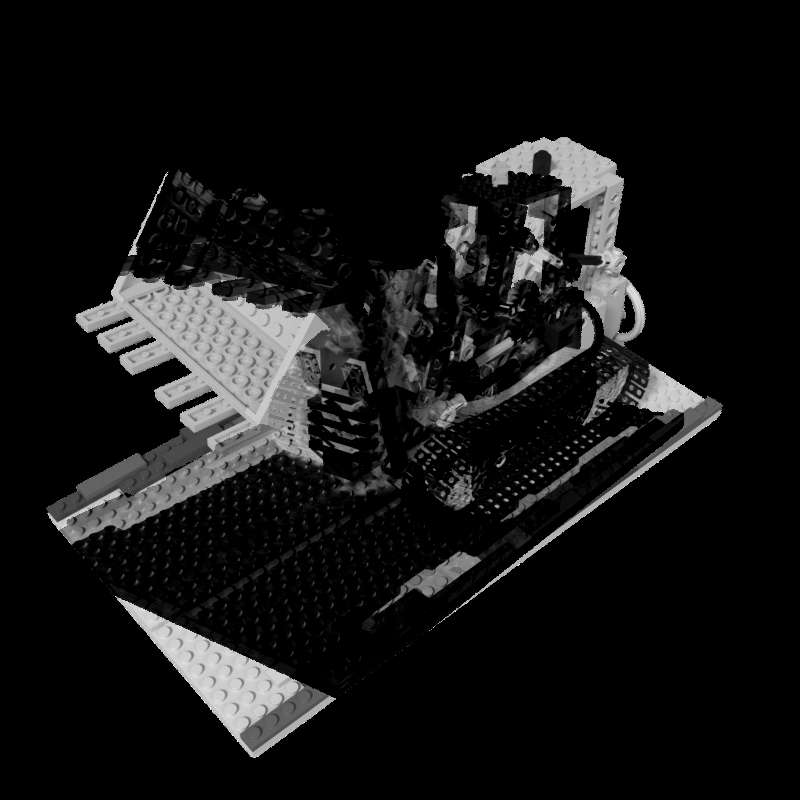

In [ ]:
'''Mean Squared Error (MSE)'''

# load the input images
img1 = io.imread('r_6.png')
img2 = io.imread('r_60.png')

# convert the images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# define the function to compute MSE between two images
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

error, diff = mse(img1, img2)
print("Image matching Error - MSE - between the two images:",error)

cv2_imshow(diff)
cv2.waitKey(0)
cv2.destroyAllWindows()